In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X , y = make_classification(
    n_samples = 100 , n_features = 2 , n_informative = 2 , n_redundant = 0,
    n_clusters_per_class = 1 , random_state = 23 , hypercube = False , class_sep = 10
)

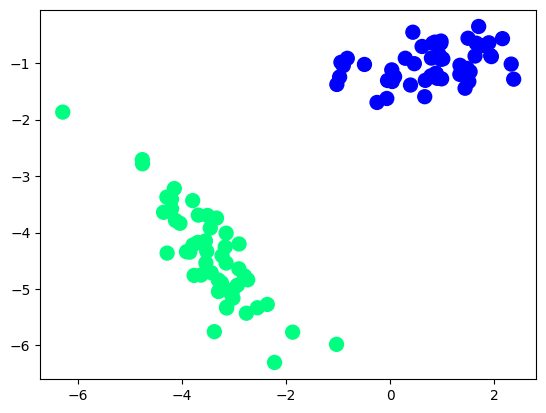

In [3]:
plt.scatter(X[ : , 0] , X[ : , 1] , c = y , cmap = 'winter' , s = 100)
plt.show()

In [4]:
# perceptron method
def perceptron(X , y):
    # add the bias column to the X
    X = np.insert(X , 0 , 1 , axis = 1) # adding a column at 0-th position
    m , n = X.shape
    # initialize random weights
    weights = np.ones(shape = n)
    lr = 0.1 # learning rate
    epochs = 1000

    for epoch in range(epochs):
        # select a random row(point)
        random_index = np.random.randint(0 , m)
        xi = X[random_index]
        # now calculate which side the point xi is of the line
        y_hat = step_function(np.dot(xi , weights))

        # now update weights
        weights = weights + lr * (y[random_index] - y_hat) * xi

    return weights[0] , weights[1 : ] # return the intercepts and coefficents

# step function
def step_function(z):
    return 1 if z > 0 else 0

In [5]:
intercept , coefs = perceptron(X , y)
print(f"intercept = {intercept}")
print(f"Coefficients = {coefs}")

intercept = -0.7999999999999998
Coefficients = [-0.3161759  -0.18315247]


In [6]:
# now as we have coefs and bias so let's calculate slope m and b
"""
ax + by + c = 0
=> y = (-a/b) x + (c/b)
"""
m = -(coefs[0] / coefs[1])
b = -(intercept / coefs[1])

In [7]:
x_input = np.linspace(start = -3 , stop = 3 , num = 100)
y_input = m*x_input + b # y = mx + b

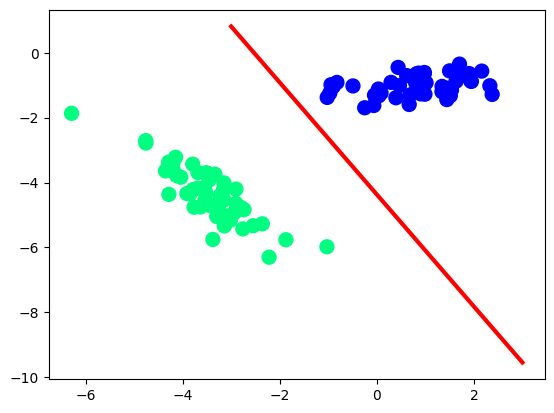

In [8]:
plt.plot(x_input , y_input , color = 'red' , linewidth = 3)
plt.scatter(X[ : , 0] , X[ : , 1] , c = y , cmap = 'winter' , s = 100)
plt.show()